# Efficiently start any Machine Learning image classification project with organized trackable datasets

## Imports

In [ ]:
import hub
from hub import Dataset, schema
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import img_as_ubyte
from glob import glob  
import tensorflow as tf
import random

## Load Data from Kaggle

In [ ]:
#!export KAGGLE_USERNAME="xxxx" && export KAGGLE_KEY="xxx" && mkdir -p data && cd data && kaggle datasets download -d alexattia/the-simpsons-characters-dataset && unzip -n the-simpsons-characters-dataset.zip

In [ ]:
!ls './data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset' # the dataset from Kaggle is duplicated in the directory  

abraham_grampa_simpson   homer_simpson            nelson_muntz
agnes_skinner            hub                      otto_mann
apu_nahasapeemapetilon   kent_brockman            patty_bouvier
barney_gumble            krusty_the_clown         principal_skinner
bart_simpson             lenny_leonard            professor_john_frink
carl_carlson             lionel_hutz              rainier_wolfcastle
charles_montgomery_burns lisa_simpson             ralph_wiggum
chief_wiggum             maggie_simpson           selma_bouvier
cletus_spuckler          marge_simpson            sideshow_bob
comic_book_guy           martin_prince            sideshow_mel
disco_stu                mayor_quimby             snake_jailbird
edna_krabappel           milhouse_van_houten      troy_mcclure
fat_tony                 miss_hoover              waylon_smithers
gil                      moe_szyslak
groundskeeper_willie     ned_flanders


## Automatic creation of the dataset with hub.auto

In [ ]:
# hub.auto
dataset_path = './data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset'
ds = Dataset.from_path(dataset_path)
print(ds.shape)
print(ds.schema)

inferred dataset found in "././data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/hub", using that
(20933,)
SchemaDict({'image': Image(shape=(None, None, None), dtype='uint8', max_shape=(1072, 1912, 3)), 'label': ClassLabel(shape=(), dtype='uint16', names=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure',

Image:


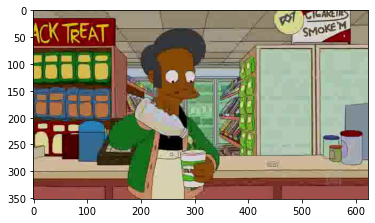

Label: "apu_nahasapeemapetilon"
Image:


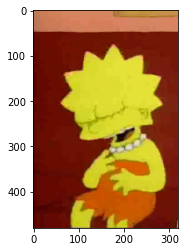

Label: "lisa_simpson"


In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds['image', idx].compute()
    label = ds['label', idx].compute(label_name=True)
    print("Image:")
    plt.imshow(image)
    plt.show()
    print("Label: \"%s\"" % (label))
    

num_images_to_display = 2
for id in range(0,num_images_to_display):
    show_image_in_ds(ds, random.randint(0,ds.shape[0]))

## Resize Images and create a new Dataset

In [ ]:
# resize images
new_shape = (256, 256, 3)
new_schema = {
    "image": schema.Image(shape=new_shape, dtype="uint8"),
    "label": schema.ClassLabel(names=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers'])
}

@hub.transform(schema=new_schema)
def resize_transform(index):
    image = resize(ds['image', index].compute(), new_shape, anti_aliasing=True)
    image = img_as_ubyte(image)  # recast from float to uint8
    label = int(ds['label', index].compute())
    return {
        "image": image,
        "label": label
    }

ds_r = resize_transform(range(ds.shape[0]))

### Send dataset to Hub

In [ ]:
url = "margauxmforsythe/simpsons_dataset_resized_256x256"

In [ ]:
# This will take some time as there are 20k images in the dataset (go grab a coffee or watch an episode of the Simpsons)
ds_r.store(url)

Your dataset is available at https://app.activeloop.ai/datasets/explore?tag=margauxmforsythe/simpsons_dataset_resized_256x256


Computing the transformation in chunks of size 682: 100%|██████████| 20.9k/20.9k [1:15:08<00:00, 4.64 items/s]


Dataset(schema=SchemaDict({'image': Image(shape=(256, 256, 3), dtype='uint8'), 'label': ClassLabel(shape=(), dtype='uint8', names=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers'], num_classes=42)}), url='margauxmforsythe/simpsons_dataset_resized_256x256', shape=(20933,), mode='w')

## Load data from Hub

In [ ]:
ds_from_hub = Dataset(url)

In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds['image', idx].compute()
    label = ds['label', idx].compute(label_name=True)
    print("Image:")
    print(image.shape)
    plt.imshow(image)
    plt.show()
    print("Label: \"%s\"" % (label))

Image:
(256, 256, 3)


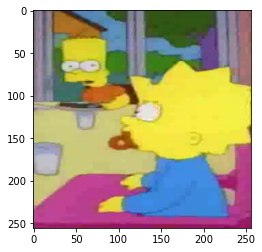

Label: "maggie_simpson"
Image:
(256, 256, 3)


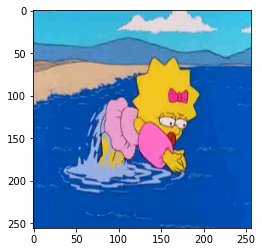

Label: "maggie_simpson"
Image:
(256, 256, 3)


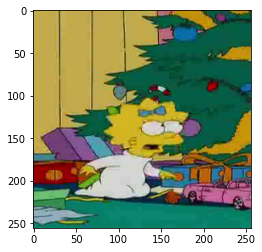

Label: "maggie_simpson"
Image:
(256, 256, 3)


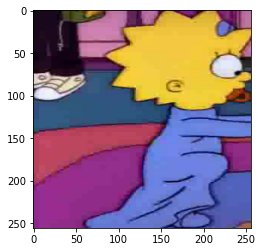

Label: "maggie_simpson"
Image:
(256, 256, 3)


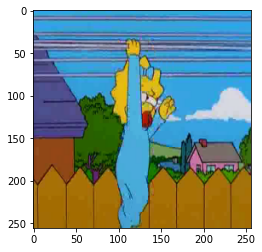

Label: "maggie_simpson"
Image:
(256, 256, 3)


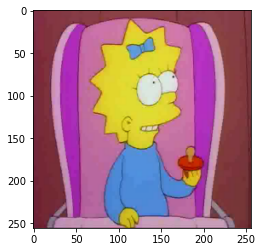

Label: "maggie_simpson"


In [ ]:
# visualize
for i in range(6):
    show_image_in_ds(ds_from_hub, i)

## Filtering

Subset only with Maggie

In [ ]:
# Creates a DatasetView object for a subset of the Dataset.
ds_only_maggie = ds_from_hub.filter(lambda x: x["label"].compute(label_name=True).startswith("maggie"))

In [ ]:
number_maggie_images_in_subset = len(ds_only_maggie)
path_to_maggie_images = './data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/maggie_simpson'
number_maggie_imgs = len(glob(f"{path_to_maggie_images}/*.jpg"))

assert number_maggie_images_in_subset == number_maggie_imgs
print(number_maggie_images_in_subset)

128


Subset without Maggie

In [ ]:
ds_without_maggie = ds.filter(lambda x: not x["label"].compute(label_name=True).startswith("maggie"))
print(ds.shape[0] - number_maggie_images_in_subset == len(ds_without_maggie)) #shape is (20805,)

True


Filtering the Simpsons family

In [ ]:
# Creates a DatasetView object for a subset of the Dataset.
ds_simpsons_family = ds_from_hub.filter(lambda x: x["label"].compute(label_name=True).startswith("maggie")
                        or x["label"].compute(label_name=True).startswith("marge")
                        or x["label"].compute(label_name=True).startswith("lisa")
                        or x["label"].compute(label_name=True).startswith("bart")
                        or x["label"].compute(label_name=True).startswith("homer"))

In [ ]:
print(len(ds_simpsons_family))

6361


## Track different versions of the dataset with Hub version control

In [ ]:
ds = Dataset(url)

ds.checkout("master")
a = ds.commit("first commit")

ds.checkout("subsets", create=True)  # creates a new branch
ds.flush()
print(ds.branches)
ds.checkout("master")

dict_keys(['master', 'subsets'])


'816c072b74cf6c9c27dc38ab99925abf6372ad5a'

In [ ]:
ds.checkout("subsets")
ds.log()


 Current Branch: subsets

commit 7d8d6c7f891139dba5c13ea57360b854ac6990d6 (master) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:22:46
Message: "first commit"



In [ ]:
dt = ds.filter(lambda x: x["label"].compute(label_name=True).startswith("maggie"))
dt.commit("Maggie images subset")
ds.log()


 Current Branch: subsets

commit 1b54aa2185d3f61167737a860f7205e15aeef7b6 (subsets) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:25:04
Message: "Maggie images subset"

commit 7d8d6c7f891139dba5c13ea57360b854ac6990d6 (master) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:22:46
Message: "first commit"



In [ ]:
ds.checkout(a)
ds.checkout("subsets")
dt = ds.filter(lambda x: x["label"].compute(label_name=True).startswith("maggie")
                        or x["label"].compute(label_name=True).startswith("marge")
                        or x["label"].compute(label_name=True).startswith("lisa")
                        or x["label"].compute(label_name=True).startswith("bart")
                        or x["label"].compute(label_name=True).startswith("homer"))
c = dt.commit("Simpsons family subset")

In [ ]:
ds.log()


 Current Branch: subsets

commit 3cf078659a6499f9e6e8bf163cc6926ab2ab3d37 (subsets) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:34:31
Message: "Simpsons family subset"

commit 1b54aa2185d3f61167737a860f7205e15aeef7b6 (subsets) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:25:04
Message: "Maggie images subset"

commit 7d8d6c7f891139dba5c13ea57360b854ac6990d6 (master) 
Author: margauxmforsythe
Commit Time:  2021-05-20 20:22:46
Message: "first commit"



In [ ]:
ds.branches

dict_keys(['master', 'subsets'])

### Save Simpsons family subset as a new Dataset

In [ ]:
ds_family_S = ds_simpsons_family.store('margauxmforsythe/simpsons_family')
ds_family_S

Your dataset is available at https://app.activeloop.ai/datasets/explore?tag=margauxmforsythe/simpsons_family


Computing the transformation in chunks of size 682: 100%|██████████| 6.36k/6.36k [29:02<00:00, 3.65 items/s]


Dataset(schema=SchemaDict({'image': Image(shape=(256, 256, 3), dtype='uint8'), 'label': ClassLabel(shape=(), dtype='uint8', names=['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers'], num_classes=42)}), url='margauxmforsythe/simpsons_family', shape=(6361,), mode='w')

In [ ]:
ds_family_S.shape

(6361,)

## Set up test set and Evaluate

In [ ]:
test_set_path = "./data/the-simpsons-characters-dataset/kaggle_simpson_testset/test"
ds_test = Dataset.from_path(test_set_path)
ds_test

parsing image classification dataset: 100%|██████████| 5/5 [00:00<00:00, 21.80it/s]
/usr/local/anaconda3/lib/python3.8/site-packages/zarr/creation.py:210: UserWarning: ignoring keyword argument 'mode'
  warn('ignoring keyword argument %r' % k)
Computing the transformation in chunks of size 145: 100%|██████████| 206/206 [00:00<00:00, 347 items/s]


Dataset(schema=SchemaDict({'image': Image(shape=(None, None, None), dtype='uint8', max_shape=(480, 640, 3)), 'label': ClassLabel(shape=(), dtype='uint8', names=['bart_simpsons', 'homer_simpsons', 'lisa_simpsons', 'maggie_simpson', 'marge_simpson'], num_classes=5)}), url='././data/the-simpsons-characters-dataset/kaggle_simpson_testset/test/hub', shape=(206,), mode='r')

In [ ]:
# resize images
new_shape = (256, 256, 3)
new_schema = {
    "image": schema.Image(shape=new_shape, dtype="uint8"),
    "label": schema.ClassLabel(names=['bart_simpsons', 'homer_simpsons', 'lisa_simpsons', 'maggie_simpson', 'marge_simpson'])
}

@hub.transform(schema=new_schema)
def resize_transform(index):
    image = resize(ds_test['image', index].compute(), new_shape, anti_aliasing=True)
    image = img_as_ubyte(image)  # recast from float to uint8
    label = int(ds_test['label', index].compute())
    return {
        "image": image,
        "label": label
    }

ds_r = resize_transform(range(ds_test.shape[0]))
ds_test = ds_r.store("margauxmforsythe/simpsons_dataset_test")
ds_test

Your dataset is available at https://app.activeloop.ai/datasets/explore?tag=margauxmforsythe/simpsons_dataset_test


Computing the transformation in chunks of size 206: 100%|██████████| 206/206 [33:32<00:00, 9.77s/ items]


Dataset(schema=SchemaDict({'image': Image(shape=(256, 256, 3), dtype='uint8'), 'label': ClassLabel(shape=(), dtype='uint8', names=['bart_simpsons', 'homer_simpsons', 'lisa_simpsons', 'maggie_simpson', 'marge_simpson'], num_classes=5)}), url='margauxmforsythe/simpsons_dataset_test', shape=(206,), mode='w')

## Training in other [notebook](https://colab.research.google.com/drive/1K0gpvflsIv9PByoy2q4P7vVagEffzkyH?usp=sharing) ran on GPU